Bayesian Network to model the influence of various cyber features in intrusion detection

In [4]:
import pandas as pd
import numpy as np
from pgmpy.estimators import ExhaustiveSearch,HillClimbSearch,K2Score, PC,TreeSearch

In [5]:
use_case ='UC1'
path_dataset = 'C:\\Users\\substationc\\Desktop\\DataFusion\\DataFusionApp\\DataFusionApp\\PythonScripts\\csvs\\'+use_case

master_file = path_dataset+'\\merged_phy_cyb_10os_30poll_encoded.csv'
os_file = path_dataset+'\\DS_merged_phy_cyb_10os_30poll_encoded_uc1.csv'
router_file = path_dataset+'\\router_merged_phy_cyb_10os_30poll_encoded_uc1.csv'

In [6]:
master_data = pd.read_csv(master_file)
os_data = pd.read_csv(os_file)
router_data = pd.read_csv(router_file)

In [7]:
master_data['Time'] = master_data['Time'].astype(str)
master_data['Time'] = pd.to_datetime(master_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#master_data['Time'] = pd.to_datetime(master_data['Time']).values.astype(np.int64)// 10**6

os_data['Time'] = os_data['Time'].astype(str)
os_data['Time'] = pd.to_datetime(os_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#os_data['Time'] = pd.to_datetime(os_data['Time']).values.astype(np.int64)// 10**6

router_data['Time'] = router_data['Time'].astype(str)
router_data['Time'] = pd.to_datetime(os_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#router_data['Time'] = pd.to_datetime(router_data['Time']).values.astype(np.int64)// 10**6

In [8]:
master_data.head(5)

,Unnamed: 0,frame_len,frame_protocols,eth_src,eth_dst,ip_src,ip_dst,ip_len,ip_flags,tcp_srcport,...,AL_dnp3_al_func,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload,value1,value2,value3,value4
0,0,72,1,1,0,1,2,12,1,5,...,129,10,0,55,2,44,NaN,NaN,NaN,NaN
1,1,286,1,0,1,2,1,9,1,1,...,129,7,0,58,1,48,NaN,NaN,NaN,-125.49
2,2,72,1,1,0,1,2,12,1,12,...,129,9,0,33,0,94,NaN,NaN,NaN,-125.49
3,3,293,1,0,1,2,1,10,1,1,...,129,12,0,38,1,126,NaN,NaN,NaN,-125.49
4,4,72,1,1,0,1,2,12,1,3,...,129,8,0,46,1,17,NaN,NaN,-197.574,-125.49


In [9]:
# rename the column name of each table to merge 
master_data.columns = ['M'+col_name for col_name in master_data.columns]
os_data.columns = ['O'+col_name for col_name in os_data.columns]
router_data.columns = ['R'+col_name for col_name in router_data.columns]

In [10]:
# join all the table with a resolution of 10 sec
master_data = master_data.set_index('MTime')
os_data = os_data.set_index('OTime')
router_data = router_data.set_index('RTime')
master_resample = master_data.resample('10S').mean()
os_resample = os_data.resample('10S').mean()
router_resample = router_data.resample('10S').mean()
res = master_resample.join(os_resample)
res = res.join(router_resample)

In [11]:
res

,MUnnamed: 0,Mframe_len,Mframe_protocols,Meth_src,Meth_dst,Mip_src,Mip_dst,Mip_len,Mip_flags,Mtcp_srcport,...,RAL_dnp3_al_func,RAL_dnp3_al_ctl,RAL_dnp3_obj,RDNP3 Object Count,RDNP3 Objects,RAL_Payload,Rvalue1,Rvalue2,Rvalue3,Rvalue4
MTime,,,,,,,,,,,,,,,,,,,,,
2020-10-17 15:51:40,1.5,180.750000,1.000000,0.500000,0.500000,1.500000,1.500000,10.750000,1.000000,4.750000,...,129.0,11.5,0.000000,47.000000,1.000000,46.750000,-125.309,-51.0801,-197.574,-125.49
2020-10-17 15:51:50,5.0,116.666667,1.000000,0.666667,0.333333,1.333333,1.666667,9.333333,1.000000,4.333333,...,129.0,4.0,0.333333,37.333333,43.000000,75.333333,-125.309,-51.0801,-197.574,-125.49
2020-10-17 15:52:00,8.0,109.000000,0.333333,0.333333,0.666667,0.666667,0.333333,2.000000,0.333333,0.333333,...,129.0,6.0,1.000000,28.000000,260.333333,96.000000,-125.309,-51.0801,-197.574,-125.49
2020-10-17 15:52:10,11.5,144.750000,1.000000,0.500000,0.500000,1.500000,1.500000,8.500000,1.000000,5.750000,...,129.0,12.5,0.000000,47.000000,1.000000,46.750000,-125.309,-51.0801,-197.574,-125.49
2020-10-17 15:52:20,15.0,117.333333,1.000000,0.666667,0.333333,1.333333,1.666667,9.666667,1.000000,3.666667,...,129.0,5.0,0.333333,37.333333,43.000000,75.333333,-125.309,-51.0801,-197.574,-125.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17 16:06:10,331.0,172.333333,1.000000,0.444444,0.555556,1.555556,1.444444,9.444444,1.000000,4.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-17 16:06:20,336.5,127.000000,1.000000,0.500000,0.500000,1.500000,1.500000,7.000000,1.000000,5.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-17 16:06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# analysing the relationship based on source and destination IP address of all the nodes
res_ip = res[['Mip_src','Oip_dst','Rip_dst','Rip_src','Mip_dst','Oip_src']]
res_ip = res_ip.dropna()
res_ip

,Mip_src,Oip_dst,Rip_dst,Rip_src,Mip_dst,Oip_src
MTime,,,,,,
2020-10-17 15:51:40,1.500000,0.750000,0.000000,0.000,1.500000,0.750000
2020-10-17 15:51:50,1.333333,1.000000,1.000000,1.000,1.666667,1.000000
2020-10-17 15:52:00,0.666667,1.666667,0.000000,0.000,0.333333,1.333333
2020-10-17 15:52:10,1.500000,0.250000,0.000000,0.000,1.500000,0.500000
2020-10-17 15:52:20,1.333333,1.666667,0.000000,0.000,1.666667,1.333333
...,...,...,...,...,...,...
2020-10-17 16:04:40,1.125000,1.000000,0.875000,1.000,1.125000,0.875000
2020-10-17 16:04:50,1.666667,1.333333,0.000000,0.000,1.333333,1.666667
2020-10-17 16:05:10,1.125000,0.375000,1.125000,1.125,1.125000,0.375000


<AxesSubplot:xlabel='MTime'>

<Figure size 1080x504 with 0 Axes>

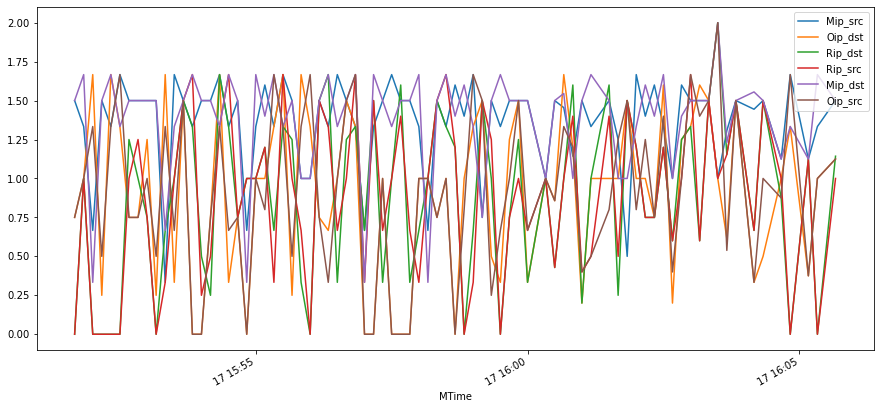

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
res_ip.plot(figsize=(15,7))

In [17]:
# Lets discretise the values to 3 boundaries
CATS = 3

def boundary_str(start,end,cat):
    return f'{cat}: {start:+0,.2f} to {end:+0,.2f}'

def relabel(v,boundaries):
    if v>=boundaries[0][0] and v <=boundaries[0][1]:
        return boundary_str(boundaries[0][0], boundaries[0][1],cat='A')
    elif v>=boundaries[1][0] and v <=boundaries[1][1]:
        return boundary_str(boundaries[1][0], boundaries[1][1],cat='B')
    elif v>=boundaries[2][0] and v <=boundaries[2][1]:
        return boundary_str(boundaries[2][0], boundaries[2][1],cat='C')
    else:
        return np.nan

def get_boundaries(cats):
    prev_cat = cats[0]
    boundaries = [(prev_cat[0],prev_cat[prev_cat.shape[0]-1])]
    for index,cat in enumerate(cats):
        if index is not 0:
            boundaries.append((prev_cat[prev_cat.shape[0]-1], cat[cat.shape[0]-1]))
            prev_cat = cat
    return boundaries

new_columns= {}
for i, content in enumerate(res_ip.items()):
    (label,series) = content
    vals = np.sort(np.array([x for x in series.tolist()],dtype=float))
    boundaries = get_boundaries(cats=np.array_split(vals,CATS))
    new_columns[label] =[relabel(val,boundaries) for val in series.tolist()]
    
discrete_dt = pd.DataFrame(data=new_columns)
discrete_dt

<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-17-e5cc7f47c723>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not 0:


,Mip_src,Oip_dst,Rip_dst,Rip_src,Mip_dst,Oip_src
0,B: +1.33 to +1.50,A: +0.00 to +0.75,A: +0.00 to +0.67,A: +0.00 to +0.67,B: +1.40 to +1.50,A: +0.00 to +0.75
1,A: +0.33 to +1.33,B: +0.75 to +1.20,B: +0.67 to +1.20,B: +0.67 to +1.15,C: +1.50 to +2.00,B: +0.75 to +1.20
2,A: +0.33 to +1.33,C: +1.20 to +1.67,A: +0.00 to +0.67,A: +0.00 to +0.67,A: +0.33 to +1.40,C: +1.20 to +2.00
3,B: +1.33 to +1.50,A: +0.00 to +0.75,A: +0.00 to +0.67,A: +0.00 to +0.67,B: +1.40 to +1.50,A: +0.00 to +0.75
4,A: +0.33 to +1.33,C: +1.20 to +1.67,A: +0.00 to +0.67,A: +0.00 to +0.67,C: +1.50 to +2.00,C: +1.20 to +2.00
...,...,...,...,...,...,...
74,A: +0.33 to +1.33,B: +0.75 to +1.20,B: +0.67 to +1.20,B: +0.67 to +1.15,A: +0.33 to +1.40,B: +0.75 to +1.20
75,C: +1.50 to +1.67,C: +1.20 to +1.67,A: +0.00 to +0.67,A: +0.00 to +0.67,A: +0.33 to +1.40,C: +1.20 to +2.00
76,A: +0.33 to +1.33,A: +0.00 to +0.75,B: +0.67 to +1.20,B: +0.67 to +1.15,A: +0.33 to +1.40,A: +0.00 to +0.75
77,A: +0.33 to +1.33,B: +0.75 to +1.20,A: +0.00 to +0.67,A: +0.00 to +0.67,C: +1.50 to +2.00,B: +0.75 to +1.20


Bayesian Inference given a prior network model

In [19]:
# lets create a simple prior model in mind
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from IPython.core.display import display,HTML

display(HTML('<style>div.output_area pre {white-space: pre;}</style>'))

model = BayesianModel([('Rip_dst','Oip_dst'),('Rip_dst','Mip_dst'),('Rip_src','Oip_src'),
                       ('Rip_src','Mip_src'),('Oip_src','Mip_dst'),('Mip_src','Oip_dst')])

model.cpds=[]
model.fit(data=discrete_dt, estimator=BayesianEstimator,
         prior_type='BDeu',complete_samples_only=False)
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd,'\n')

CPT of Rip_dst:
+----------------------------+----------+
| Rip_dst(A: +0.00 to +0.67) | 0.365079 |
+----------------------------+----------+
| Rip_dst(B: +0.67 to +1.20) | 0.305556 |
+----------------------------+----------+
| Rip_dst(C: +1.20 to +2.00) | 0.329365 |
+----------------------------+----------+ 

CPT of Oip_dst:
+----------------------------+-----+----------------------------+
| Mip_src                    | ... | Mip_src(C: +1.50 to +1.67) |
+----------------------------+-----+----------------------------+
| Rip_dst                    | ... | Rip_dst(C: +1.20 to +2.00) |
+----------------------------+-----+----------------------------+
| Oip_dst(A: +0.00 to +0.75) | ... | 0.052083333333333336       |
+----------------------------+-----+----------------------------+
| Oip_dst(B: +0.75 to +1.20) | ... | 0.052083333333333336       |
+----------------------------+-----+----------------------------+
| Oip_dst(C: +1.20 to +1.67) | ... | 0.8958333333333334         |
+-----------

C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


Structure Learning without any given model, using Chow Liu Tree Algorithm

In [20]:
est = TreeSearch(discrete_dt)
dag = est.estimate(estimator_type='chow-liu')
print(dag.edges())

Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[('Oip_dst', 'Oip_src'), ('Oip_dst', 'Mip_dst'), ('Oip_src', 'Rip_dst'), ('Mip_dst', 'Mip_src'), ('Rip_dst', 'Rip_src')]


Structure Learning without any given model, using Tree-Augmented Naive Bayes (TAN) structure from Data

In [21]:
est = TreeSearch(discrete_dt)
dag = est.estimate(estimator_type='tan')
print(dag.edges())

Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[('Oip_dst', 'Mip_dst'), ('Oip_dst', 'Rip_dst'), ('Mip_dst', 'Mip_src'), ('Rip_dst', 'Rip_src'), ('Oip_src', 'Mip_src'), ('Oip_src', 'Oip_dst'), ('Oip_src', 'Rip_dst'), ('Oip_src', 'Rip_src'), ('Oip_src', 'Mip_dst')]


Structure Learning without any given model, using Hill Climbing Search Algo

In [22]:
scoring_method = K2Score(data=discrete_dt)
est = HillClimbSearch(data= discrete_dt)
est_model = est.estimate(scoring_method=scoring_method,max_iter=1e3,max_indegree=4)
print(est_model.edges())

  0%|          | 0/1000 [00:00<?, ?it/s]

[('Mip_src', 'Mip_dst'), ('Oip_dst', 'Oip_src'), ('Rip_dst', 'Oip_dst'), ('Rip_src', 'Rip_dst'), ('Mip_dst', 'Oip_dst')]


In [23]:
est = PC(data=discrete_dt)
est_model = est.estimate(variant='orig')
print(est_model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

[('Rip_src', 'Rip_dst'), ('Mip_src', 'Mip_dst'), ('Oip_dst', 'Oip_src')]


Structure Learning with Exhaustive Search

In [ ]:
est = ExhaustiveSearch(discrete_dt)
for score,model in est.all_scores():
    print(score,model.edges())